## **SCORING - Vitamin E: Workflow7**
#### **Micha Birklbauer 2021-08-02**

In [1]:
import os
from shutil import copyfile
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:GLN129B,Hydrophobic_Interaction:VAL397B,Hydrophobic_Interaction:ASP170B,Hydrophobic_Interaction:ALA388B,Hydrogen_Bond:PHE169B,Pi-Stacking:HIS130B,Salt_Bridge:LYS133B,Hydrophobic_Interaction:GLN611B,...,Hydrogen_Bond:GLU134B,Hydrogen_Bond:ASP170B,Hydrophobic_Interaction:VAL107B,Hydrogen_Bond:ARG165B,Salt_Bridge:ARG138B,Hydrogen_Bond:THR137B,Hydrophobic_Interaction:PHE169B,Salt_Bridge:ARG68B,Hydrogen_Bond:GLN15B,LABEL
0,1,28|VitaminE_allmin_active|sdf|28,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,active
1,2,124|VitaminE_allmin_active|sdf|124,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,active
2,3,47|VitaminE_allmin_active|sdf|47,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,active
3,4,49|VitaminE_allmin_active|sdf|49,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,active
4,5,63|VitaminE_allmin_decoy|sdf|63,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,40|VitaminE_allmin_active|sdf|40,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,active
85,86,68|VitaminE_allmin_decoy|sdf|68,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,inactive
86,87,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,active
87,88,127|VitaminE_allmin_active|sdf|127,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 120) 62


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 120) 16


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 120) 19


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:PHE393B,0.267025,0.177419,0.444444
1,2,Hydrophobic_Interaction:ARG101B,0.246117,0.161290,0.407407
2,3,Hydrogen_Bond:GLN15B,0.213859,0.193548,0.407407
3,4,Hydrogen_Bond:VAL110B,0.188172,0.854839,0.666667
4,5,Hydrogen_Bond:GLU134B,0.185783,0.370968,0.185185
...,...,...,...,...,...
112,113,Hydrogen_Bond:ASP106B,0.004779,0.032258,0.037037
113,114,Pi-Stacking:PHE402B,0.004779,0.032258,0.037037
114,115,Hydrogen_Bond:ARG165B,0.004779,0.032258,0.037037
115,116,Hydrogen_Bond:THR137B,0.004779,0.032258,0.037037


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:PHE393B,0.267025,0.177419,0.444444
1,2,Hydrophobic_Interaction:ARG101B,0.246117,0.161290,0.407407
2,3,Hydrogen_Bond:GLN15B,0.213859,0.193548,0.407407
3,4,Hydrogen_Bond:VAL110B,0.188172,0.854839,0.666667
4,5,Hydrogen_Bond:GLU134B,0.185783,0.370968,0.185185
5,6,Hydrogen_Bond:GLU108B,0.181004,0.403226,0.222222
6,7,Hydrophobic_Interaction:TYR383B,0.172043,0.161290,0.333333
7,8,Hydrophobic_Interaction:VAL397B,0.167264,0.129032,0.296296
8,9,Hydrophobic_Interaction:GLN141B,0.167264,0.129032,0.296296
9,10,Hydrophobic_Interaction:ASP166B,0.167264,0.129032,0.296296


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Hydrogen_Bond:VAL110B',
 'Hydrogen_Bond:GLU134B',
 'Hydrogen_Bond:GLU108B',
 'Hydrophobic_Interaction:LYS133B',
 'Hydrogen_Bond:ASP170B',
 'Hydrophobic_Interaction:ALA388B',
 'Hydrophobic_Interaction:GLU108B',
 'Hydrophobic_Interaction:THR137B',
 'Hydrophobic_Interaction:VAL107B',
 'Salt_Bridge:HIS130B',
 'Hydrophobic_Interaction:LEU111B']

In [14]:
negatives

['Hydrophobic_Interaction:PHE393B',
 'Hydrophobic_Interaction:ARG101B',
 'Hydrogen_Bond:GLN15B',
 'Hydrophobic_Interaction:TYR383B',
 'Hydrophobic_Interaction:VAL397B',
 'Hydrophobic_Interaction:GLN141B',
 'Hydrophobic_Interaction:ASP166B',
 'Hydrogen_Bond:ARG101B',
 'Hydrogen_Bond:TRP102B']

#### **Score Compounds with different strategies & save results:**

In [15]:
# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
# train_result_strat1_sorted.to_csv("train_scores1.csv")
# train_result_strat2_sorted.to_csv("train_scores2.csv")
# train_result_strat3_sorted.to_csv("train_scores3.csv")
# train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [0, 0.6966292134831461] 
Strategy 2:  [0, 0.6966292134831461] 
Strategy 3:  [-3, 0.7528089887640449] 
Strategy 4:  [-4, 0.7528089887640449]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -4, "accuracy")
)

Strategy 1:  0.6966292134831461 
Strategy 2:  0.6966292134831461 
Strategy 3:  0.7528089887640449 
Strategy 4:  0.7528089887640449


*false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -4, "fpr")
)

Strategy 1:  1.0 
Strategy 2:  1.0 
Strategy 3:  0.7037037037037037 
Strategy 4:  0.7777777777777778


#### **Calculate validation and test results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [20]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [21]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6966292134831461, 'FPR': 1.0, 'AUC': 0.6624850657108721, 'Ya': 0.6966292134831461, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6966292134831461, 'FPR': 1.0, 'AUC': 0.6708482676224612, 'Ya': 0.6966292134831461, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.7528089887640449, 'FPR': 0.7037037037037037, 'AUC': 0.6941457586618878, 'Ya': 0.7564102564102564, 'EF': 1.085814722911497, 'REF': 95.16129032258064} 
Strategy 4:  {'ACC': 0.7528089887640449, 'FPR': 0.7777777777777778, 'AUC': 0.7090800477897252, 'Ya': 0.7439024390243902, 'EF': 1.0678599527930763, 'REF': 98.38709677419355}


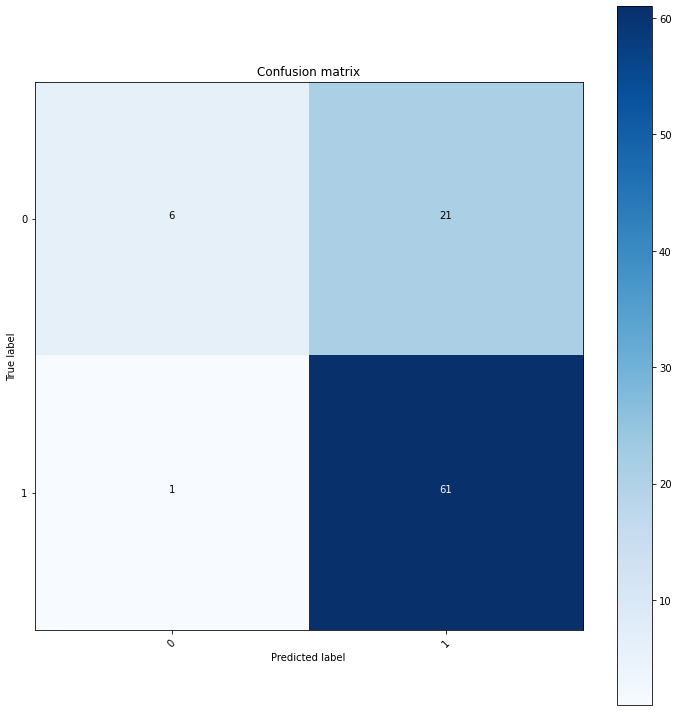

In [22]:
plot_confusion_matrix(get_metrics(train_result_strat4, -4)["CM"], classes = [0, 1], filename = "results/CM_train_strat4.png");

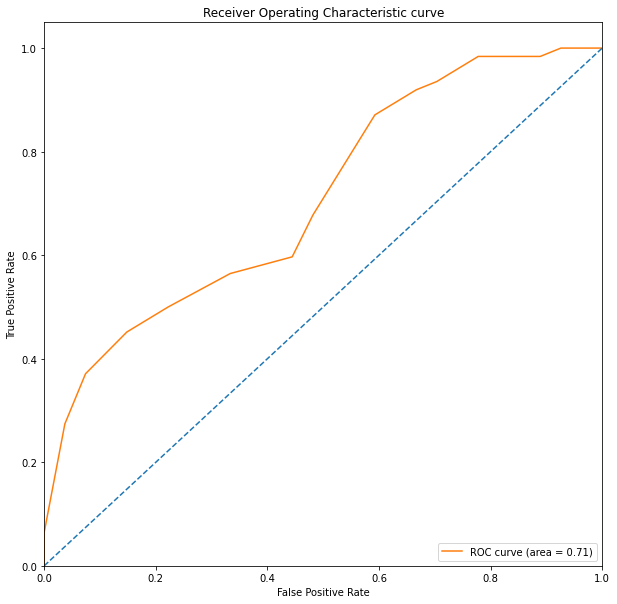

In [23]:
roc = get_metrics(train_result_strat4, -4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat4.png");

*validation data:*

In [24]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6956521739130435, 'FPR': 1.0, 'AUC': 0.5892857142857142, 'Ya': 0.6956521739130435, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6956521739130435, 'FPR': 1.0, 'AUC': 0.59375, 'Ya': 0.6956521739130435, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.782608695652174, 'FPR': 0.7142857142857143, 'AUC': 0.6830357142857143, 'Ya': 0.7619047619047619, 'EF': 1.0952380952380951, 'REF': 100.0} 
Strategy 4:  {'ACC': 0.7391304347826086, 'FPR': 0.8571428571428571, 'AUC': 0.6696428571428572, 'Ya': 0.7272727272727273, 'EF': 1.0454545454545454, 'REF': 100.0}


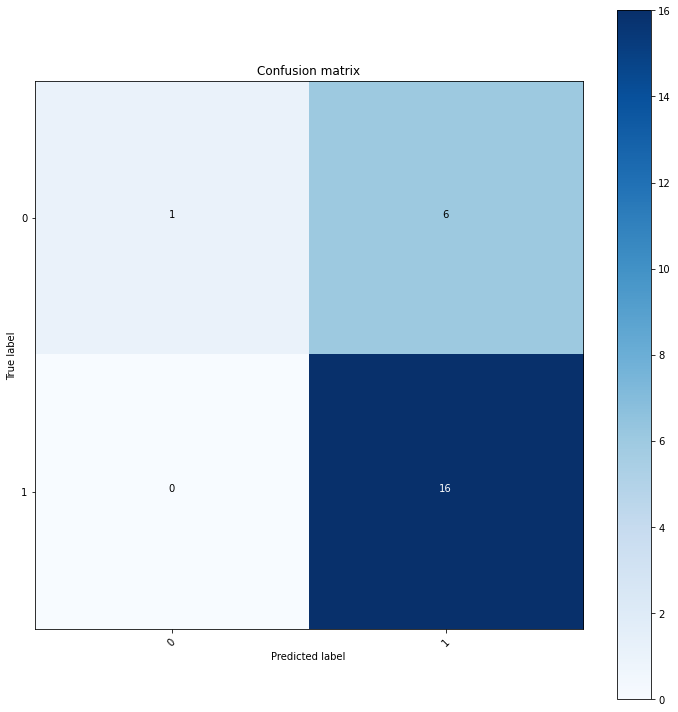

In [25]:
plot_confusion_matrix(get_metrics(val_result_strat4, -4)["CM"], classes = [0, 1], filename = "results/CM_val_strat4.png");

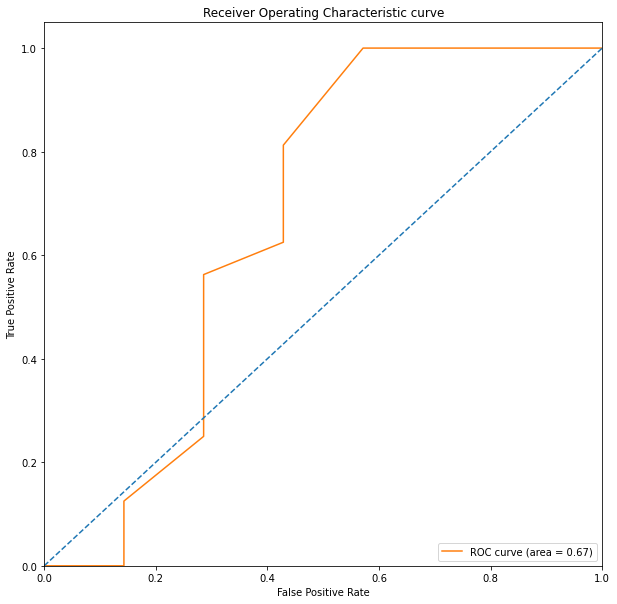

In [26]:
roc = get_metrics(val_result_strat4, -4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat4.png");

*test data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 0, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 0, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -4, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6551724137931034, 'FPR': 1.0, 'AUC': 0.6210526315789473, 'Ya': 0.6551724137931034, 'EF': 1.0, 'REF': 100.0} 
Strategy 2:  {'ACC': 0.6551724137931034, 'FPR': 1.0, 'AUC': 0.6184210526315789, 'Ya': 0.6551724137931034, 'EF': 1.0, 'REF': 100.0} 
Strategy 3:  {'ACC': 0.5517241379310345, 'FPR': 1.0, 'AUC': 0.531578947368421, 'Ya': 0.6153846153846154, 'EF': 0.9392712550607288, 'REF': 84.21052631578948} 
Strategy 4:  {'ACC': 0.5862068965517241, 'FPR': 1.0, 'AUC': 0.5263157894736843, 'Ya': 0.6296296296296297, 'EF': 0.9610136452241717, 'REF': 89.47368421052632}


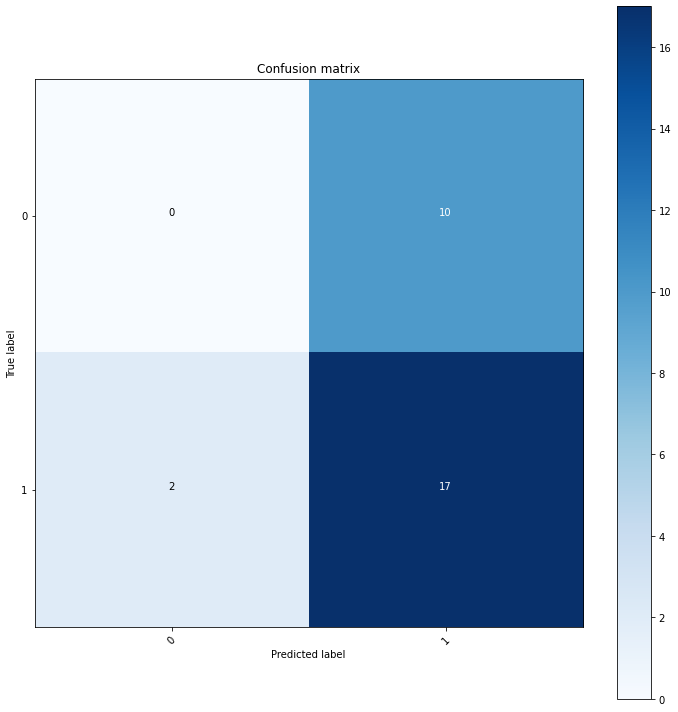

In [28]:
plot_confusion_matrix(get_metrics(test_result_strat4, -4)["CM"], classes = [0, 1], filename = "results/CM_test_strat4.png");

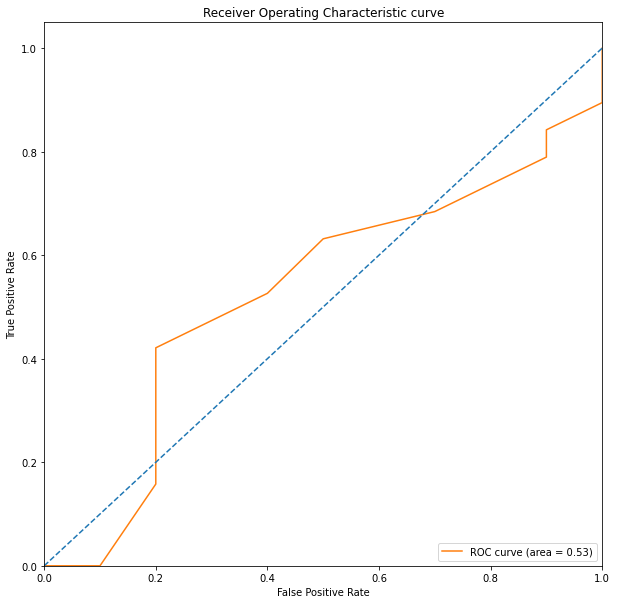

In [29]:
roc = get_metrics(test_result_strat4, -4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat4.png");

#### **Clean up:**

In [30]:
os.remove("scoring.py")